In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import numba as nb
import cython as cy
import scipy
import const
from scipy import *
from scipy.integrate import odeint
import math as m

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres constants
c = 3 * 10**8  # Vitesse de la lumière en m/s
mp = 1.67e-27  # Masse du proton en kg
Gamma_sh_max = 100  # Facteur de Lorentz maximal du choc
E = 10**43  # Énergie isotrope équivalente en joules
n0 = 10**3  # Densité de nombre en m^-3
phi = np.radians(5)  # Angle phi en radians
tetav = np.radians(0)  # Angle tetav en radians
#Pour l'instant on prend une valeur de T = 0

# Fonctions pour C_BM et C_ST
def C_BM(E, n0, mp, c):
    return np.sqrt(17 * E / (8 * np.pi * n0 * mp * c**5))

def C_ST(E, n0, mp, c):
    return (2/5) * 1.15 * (E / (n0 * mp * c**5))**(1/5)

# Calculer le rayon R pour un temps T donné et un angle theta
def Rfunc(t, mu, c):
    return c * t/ mu

# Générer les valeurs de T et theta
t_values = np.linspace(10**0 * 86400, 10**4 * 86400, 5)  # Temps observé en secondes (1 jour à 10000 jours)
theta_values = np.linspace(0, np.pi/2, 100)  # Angles polaires

# Fonction pour calculer mu
def calculate_mu(theta, phi, tetav):
    return np.sin(theta) * np.sin(tetav) * np.cos(phi) + np.cos(theta) * np.cos(tetav)

On prend un $\theta_{v}$ = 0 pour déterminer t pour chacun des angles donné

In [18]:
T = 0
def radiusp(T, theta,phi, c):
    def f(R,t):
        return T+ calculate_mu(theta, phi, 0)* R / c

    Rp = 0
    Rs = 1
    while abs(Rp - Rs) > 10 ** (-2):
        sol = odeint(f, [0, Rs], [0, T])
        Rp = Rs
        Rs = sol[0][1]
    return Rs

def t_t(theta,T,phi):
    ans = calculate_mu(theta, phi, 0)
    return T + ans*radiusp(T,theta,phi,const.celer)/const.celer


print(t_t([150,180],T,[598,159]))

[ 2.33244963e-09 -1.99624791e-09]


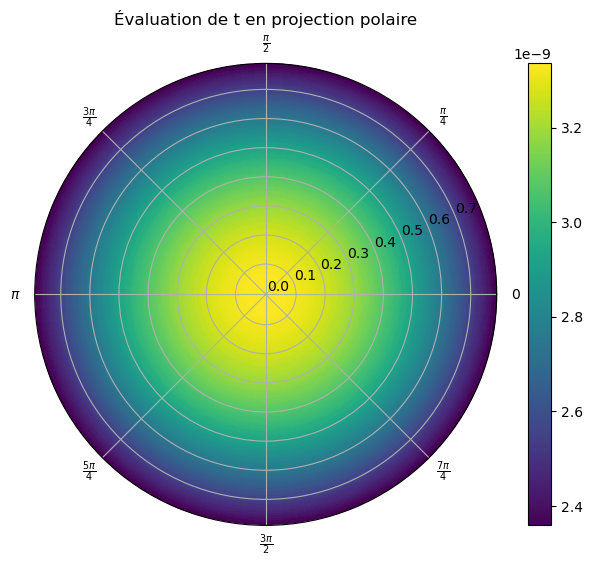

In [19]:
#Première tentative pour une vitesse du shell constante

phi = np.linspace(0,2*np.pi,100)
theta = np.linspace(0,np.pi/4,100)
Phi, Theta = np.meshgrid(phi, theta)
#On détermine un tableau qui est composé des coordonées de phi et théta:
list = []
for u in Phi:
    ans = []
    for v in u:
        ans.append(v)
    list.append(ans)
for k in range (len(list)):
    for i in range (len(list[k])):
        list[k][i] = [list[k][i], Theta[k][i]]
for k in range (len(list)):
    for i in range (len(list[k])):
        list[k][i] = t_t(list[k][i][1],T,list[k][i][0])
Z = np.array(list)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))
c = ax.pcolormesh(Phi, Theta, Z, shading='auto')
angles_pi = np.linspace(0, 2*np.pi, 8, endpoint=False)  # 8 segments égaux
labels = [r'$0$', r'$\frac{\pi}{4}$', r'$\frac{\pi}{2}$', r'$\frac{3\pi}{4}$',
          r'$\pi$', r'$\frac{5\pi}{4}$', r'$\frac{3\pi}{2}$', r'$\frac{7\pi}{4}$']

# Appliquer les étiquettes en radians aux angles
ax.set_xticks(angles_pi)  # Définit les positions des étiquettes
ax.set_xticklabels(labels)  # Définit les étiquettes
plt.colorbar(c, ax=ax)
plt.title("Évaluation de t en projection polaire")
plt.show()



